<a href="https://colab.research.google.com/github/koushikroy/facial_sentiment_analysis/blob/main/01_sentiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dateset Loading and Preprocessing

## Downloading Dataset

In [1]:
!wget https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset.csv

--2021-07-04 19:21:10--  https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 734679 (717K) [text/plain]
Saving to: ‘imp_fea_dataset.csv’

imp_fea_dataset.csv 100%[===================>] 717.46K  --.-KB/s    in 0.03s   

2021-07-04 19:21:10 (22.1 MB/s) - ‘imp_fea_dataset.csv’ saved [734679/734679]



## Exploring and Cleaning 

In [3]:
sentiment_data_original = pd.read_csv('/content/imp_fea_dataset.csv')

In [8]:
sentiment_data_original.tail(10)

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,335y,318y,337y,53y,88y,70y,296y,300y,10y,283y,405y,109y,181y,338y,404y,64y,152y,406y,180y,...,90y,91y,319y,225y,89y,322y,69y,28y,92y,47y,201y,71y,407y,445y,299y,183y,30y,29y,258y,277y,301y,222y,422y,259y,260y,202y,226y,326y,325y,442y,97y,96y,308y,55y,78y,31y,77x,62x,446y,output
377,377,0.057580,0.055737,0.065687,0.801167,0.818832,0.083737,0.780952,0.183740,0.065642,0.793096,0.795049,0.809582,0.186704,0.165832,0.811745,0.772483,0.774350,0.762443,0.188844,0.207339,0.162688,0.757256,0.179141,0.209117,0.758892,0.134172,0.190719,0.116605,0.190279,0.186344,0.770469,0.129753,0.774425,0.120699,0.755866,0.207796,0.126575,0.784453,0.759354,...,0.739835,0.748364,0.729835,0.249875,0.734068,0.749575,0.189142,0.255679,0.755268,0.254551,0.837217,0.244238,0.788454,0.227103,0.161308,0.792613,0.264189,0.258699,0.237220,0.226976,0.215179,0.262739,0.826948,0.243718,0.243232,0.829023,0.270396,0.715528,0.713580,0.253272,0.720639,0.718345,0.716413,0.168870,0.722262,0.281437,0.381628,0.372905,0.245757,7
378,378,0.040592,0.040692,0.047109,0.654993,0.672020,0.065316,0.641142,0.202215,0.053557,0.651571,0.652379,0.669638,0.200389,0.192254,0.670740,0.638445,0.639278,0.631217,0.208053,0.230943,0.186614,0.630313,0.202685,0.228505,0.631049,0.129696,0.221475,0.119150,0.211153,0.215496,0.644172,0.124206,0.646468,0.118786,0.633602,0.217353,0.122361,0.660655,0.635555,...,0.631836,0.639293,0.626436,0.267508,0.629169,0.646994,0.181760,0.281251,0.650276,0.263247,0.751484,0.248831,0.697252,0.254795,0.164786,0.699135,0.285882,0.282808,0.270919,0.247369,0.231996,0.280367,0.751272,0.273957,0.274674,0.752188,0.281065,0.625427,0.625727,0.274864,0.629223,0.629305,0.628706,0.150145,0.632859,0.296373,0.365360,0.358874,0.267231,7
379,379,0.047037,0.053698,0.046003,0.770048,0.788251,0.056144,0.750620,0.156649,0.070998,0.764836,0.761400,0.782575,0.152988,0.173056,0.779074,0.745185,0.742156,0.733062,0.169833,0.182511,0.176366,0.730659,0.178300,0.177955,0.727808,0.106601,0.199033,0.121661,0.180796,0.200876,0.746139,0.110306,0.740194,0.118150,0.731752,0.170150,0.115850,0.761606,0.726194,...,0.706904,0.714593,0.708938,0.221408,0.701755,0.730570,0.151339,0.235026,0.722049,0.217638,0.822608,0.205933,0.774658,0.245622,0.177707,0.766834,0.240011,0.240398,0.254243,0.246486,0.235120,0.245001,0.817570,0.255411,0.262755,0.811974,0.237825,0.697261,0.695497,0.255156,0.688571,0.687340,0.699216,0.131469,0.689959,0.253661,0.373065,0.364895,0.264379,7
380,380,0.038742,0.039927,0.044908,0.779642,0.797376,0.062250,0.760387,0.160638,0.053302,0.772826,0.772665,0.788991,0.163712,0.152644,0.788701,0.752912,0.753125,0.742578,0.166608,0.185035,0.153232,0.738023,0.162163,0.186700,0.738493,0.111425,0.177800,0.103095,0.170424,0.176983,0.750672,0.108207,0.751327,0.103806,0.736526,0.185495,0.107094,0.764945,0.737706,...,0.718163,0.725451,0.711383,0.229659,0.713362,0.730885,0.167603,0.237541,0.731675,0.233397,0.821835,0.223394,0.771396,0.219769,0.155336,0.770925,0.245654,0.240755,0.229030,0.221739,0.210895,0.243217,0.811490,0.233206,0.236532,0.811017,0.250121,0.698028,0.695835,0.238348,0.699747,0.698154,0.699124,0.149014,0.700718,0.262499,0.397183,0.388481,0.239594,7
381,381,0.053937,0.054906,0.059472,0.694596,0.713002,0.075700,0.676611,0.181332,0.067848,0.689126,0.689278,0.706888,0.182350,0.175700,0.707152,0.671113,0.671233,0.661777,0.186636,0.204843,0.174682,0.659092,0.183678,0.204631,0.659164,0.125358,0.199891,0.118878,0.190370,0.197745,0.674233,0.120685,0.674856,0.117358,0.660795,0.199966,0.119472,0.690309,0.661247,...,0.649403,0.657515,0.644188,0.238722,0.644811,0.665620,0.175866,0.247640,0.666517,0.241140,0.767444,0.231280,0.712181,0.231532,0.166143,0.712219,0.253810,0.248616,0.241714,0.232748,0.222143,0.248604,0.759778,0.243649,0.247142,0.759250,0.254537,0.637217,0.635968,0.245965,0.637844,0.636478,0.639595,0.154425,0.640696,0.265902,0.384331,0.376635,0.246866,7
382,382,0.042583,0.045035,0.047134,0.728


**From the dataset, we can see that:**
*   There are in total 937 Columns excluding the index column 
*   The first 936 columns represents the landmark points in the face and the 'output' column represnts the emotion
*   The face has been cropped and resized thus no need for further normalization



In [5]:
sentiment_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Columns: 102 entries, Unnamed: 0 to output
dtypes: float64(100), int64(2)
memory usage: 308.5 KB


In [7]:
#value_count in the output column 
sentiment_data_original['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64



> So you can see that the neutral category has a staggering number of input compared to othet categories. This can be a later as the model might be overflitted. So, we need to take care of this.



In [10]:
sentiment_data_small_version = sentiment_data_original
sentiment_data_small_version

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,335y,318y,337y,53y,88y,70y,296y,300y,10y,283y,405y,109y,181y,338y,404y,64y,152y,406y,180y,...,90y,91y,319y,225y,89y,322y,69y,28y,92y,47y,201y,71y,407y,445y,299y,183y,30y,29y,258y,277y,301y,222y,422y,259y,260y,202y,226y,326y,325y,442y,97y,96y,308y,55y,78y,31y,77x,62x,446y,output
0,0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274,0.222080,0.673641,0.234514,0.259857,0.675797,0.169770,0.251879,0.159167,0.243084,0.248609,0.687927,0.166242,0.692763,0.160365,0.677250,0.249370,0.165286,0.702218,0.681785,...,0.677961,0.685568,0.668658,0.295010,0.674744,0.688078,0.213322,0.306147,0.695070,0.290614,0.775533,0.275985,0.727246,0.282305,0.196207,0.731739,0.311140,0.306318,0.295218,0.275201,0.259249,0.303790,0.772824,0.297142,0.298986,0.775157,0.306662,0.669025,0.667577,0.297944,0.676777,0.674650,0.672384,0.179662,0.680488,0.320749,0.365988,0.359189,0.292456,0
1,1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065,0.233286,0.638513,0.246897,0.275109,0.640868,0.180109,0.263580,0.168977,0.254662,0.258694,0.653565,0.174024,0.659207,0.168450,0.643540,0.264527,0.172342,0.667974,0.648536,...,0.647792,0.655260,0.637938,0.302938,0.644361,0.657061,0.222941,0.311552,0.665310,0.300203,0.746999,0.286466,0.695820,0.284965,0.202315,0.703365,0.316241,0.309106,0.296829,0.277635,0.263057,0.305376,0.742319,0.297439,0.299121,0.747618,0.311871,0.640539,0.638694,0.298007,0.648763,0.646393,0.644356,0.187314,0.653283,0.323162,0.416444,0.409262,0.291724,0
2,2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444,0.216089,0.635543,0.226580,0.254535,0.637335,0.164377,0.243990,0.153830,0.234519,0.241096,0.649563,0.159373,0.653839,0.153670,0.639724,0.245381,0.158003,0.662932,0.643669,...,0.641113,0.648317,0.632508,0.285705,0.638079,0.650801,0.207404,0.294994,0.657289,0.282803,0.731376,0.268743,0.687396,0.271849,0.189208,0.692087,0.300169,0.293459,0.283855,0.265146,0.249984,0.289564,0.729418,0.284528,0.287387,0.732354,0.296178,0.633570,0.631925,0.284262,0.640842,0.638711,0.636973,0.173512,0.644635,0.308359,0.387020,0.380484,0.280708,0
3,3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033,0.191865,0.633418,0.210470,0.242735,0.637605,0.156903,0.223781,0.136231,0.220827,0.217122,0.649569,0.150251,0.658837,0.139265,0.637484,0.235818,0.145927,0.665114,0.646164,...,0.643557,0.652164,0.627880,0.276592,0.639275,0.649096,0.204637,0.285989,0.662667,0.275408,0.739109,0.263612,0.689911,0.248962,0.168739,0.700658,0.291710,0.285080,0.263866,0.240913,0.226429,0.281110,0.734375,0.267115,0.266131,0.741187,0.288948,0.628023,0.626254,0.269768,0.642509,0.639889,0.631558,0.176984,0.647038,0.301468,0.420678,0.413922,0.258211,0
4,4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610,0.241420,0.619820,0.264192,0.282194,0.621537,0.194297,0.275809,0.182683,0.271582,0.266411,0.633075,0.190689,0.636794,0.184616,0.622806,0.267537,0.188401,0.646956,0.626267,...,0.621448,0.628735,0.613961,0.307392,0.617952,0.632668,0.228110,0.316719,0.638160,0.301570,0.723486,0.286816,0.672381,0.290148,0.206634,0.677821,0.319981,0.316711,0.302736,0.279618,0.263326,0.318060,0.718060,0.305727,0.303800,0.722054,0.315123,0.612670,0.611621,0.311015,0.617605,0.616392,0.615768,0.192330,0.621173,0.326305,0.407039,0.400207,0.295642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [11]:
sentiment_data_small_version['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64

## Mapping The Output Column

In [12]:
input_df_copy = sentiment_data_small_version

## Train Test Split

In [13]:
X = input_df_copy.drop("output", axis=1)
X = X.drop("Unnamed: 0", axis=1)
X

,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,335y,318y,337y,53y,88y,70y,296y,300y,10y,283y,405y,109y,181y,338y,404y,64y,152y,406y,180y,105y,...,443y,90y,91y,319y,225y,89y,322y,69y,28y,92y,47y,201y,71y,407y,445y,299y,183y,30y,29y,258y,277y,301y,222y,422y,259y,260y,202y,226y,326y,325y,442y,97y,96y,308y,55y,78y,31y,77x,62x,446y
0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274,0.222080,0.673641,0.234514,0.259857,0.675797,0.169770,0.251879,0.159167,0.243084,0.248609,0.687927,0.166242,0.692763,0.160365,0.677250,0.249370,0.165286,0.702218,0.681785,0.183595,...,0.282703,0.677961,0.685568,0.668658,0.295010,0.674744,0.688078,0.213322,0.306147,0.695070,0.290614,0.775533,0.275985,0.727246,0.282305,0.196207,0.731739,0.311140,0.306318,0.295218,0.275201,0.259249,0.303790,0.772824,0.297142,0.298986,0.775157,0.306662,0.669025,0.667577,0.297944,0.676777,0.674650,0.672384,0.179662,0.680488,0.320749,0.365988,0.359189,0.292456
1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065,0.233286,0.638513,0.246897,0.275109,0.640868,0.180109,0.263580,0.168977,0.254662,0.258694,0.653565,0.174024,0.659207,0.168450,0.643540,0.264527,0.172342,0.667974,0.648536,0.194566,...,0.287110,0.647792,0.655260,0.637938,0.302938,0.644361,0.657061,0.222941,0.311552,0.665310,0.300203,0.746999,0.286466,0.695820,0.284965,0.202315,0.703365,0.316241,0.309106,0.296829,0.277635,0.263057,0.305376,0.742319,0.297439,0.299121,0.747618,0.311871,0.640539,0.638694,0.298007,0.648763,0.646393,0.644356,0.187314,0.653283,0.323162,0.416444,0.409262,0.291724
2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444,0.216089,0.635543,0.226580,0.254535,0.637335,0.164377,0.243990,0.153830,0.234519,0.241096,0.649563,0.159373,0.653839,0.153670,0.639724,0.245381,0.158003,0.662932,0.643669,0.179022,...,0.271447,0.641113,0.648317,0.632508,0.285705,0.638079,0.650801,0.207404,0.294994,0.657289,0.282803,0.731376,0.268743,0.687396,0.271849,0.189208,0.692087,0.300169,0.293459,0.283855,0.265146,0.249984,0.289564,0.729418,0.284528,0.287387,0.732354,0.296178,0.633570,0.631925,0.284262,0.640842,0.638711,0.636973,0.173512,0.644635,0.308359,0.387020,0.380484,0.280708
3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033,0.191865,0.633418,0.210470,0.242735,0.637605,0.156903,0.223781,0.136231,0.220827,0.217122,0.649569,0.150251,0.658837,0.139265,0.637484,0.235818,0.145927,0.665114,0.646164,0.173008,...,0.252855,0.643557,0.652164,0.627880,0.276592,0.639275,0.649096,0.204637,0.285989,0.662667,0.275408,0.739109,0.263612,0.689911,0.248962,0.168739,0.700658,0.291710,0.285080,0.263866,0.240913,0.226429,0.281110,0.734375,0.267115,0.266131,0.741187,0.288948,0.628023,0.626254,0.269768,0.642509,0.639889,0.631558,0.176984,0.647038,0.301468,0.420678,0.413922,0.258211
4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610,0.241420,0.619820,0.264192,0.282194,0.621537,0.194297,0.275809,0.182683,0.271582,0.266411,0.633075,0.190689,0.636794,0.184616,0.622806,0.267537,0.188401,0.646956,0.626267,0.203949,...,0.296709,0.621448,0.628735,0.613961,0.307392,0.617952,0.632668,0.228110,0.316719,0.638160,0.301570,0.723486,0.286816,0.672381,0.290148,0.206634,0.677821,0.319981,0.316711,0.302736,0.279618,0.263326,0.318060,0.718060,0.305727,0.303800,0.722054,0.315123,0.612670,0.611621,0.311015,0.617605,0.616392,0.615768,0.192330,0.621173,0.326305,0.407039,0.400207,0.29564

In [14]:
# Create X & y

y = input_df_copy["output"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Declaration and Training

## Model 1

### Declaration

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)

### Training

In [16]:
history_1 = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/2000
10/10 [==============================] - 1s 38ms/step - loss: 2.0615 - accuracy: 0.1942 - val_loss: 2.0430 - val_accuracy: 0.1026
Epoch 2/2000
10/10 [==============================] - 0s 5ms/step - loss: 2.0162 - accuracy: 0.2136 - val_loss: 2.0253 - val_accuracy: 0.1026
Epoch 3/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9825 - accuracy: 0.2136 - val_loss: 2.0141 - val_accuracy: 0.2179
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9797 - accuracy: 0.2298 - val_loss: 2.0276 - val_accuracy: 0.2179
Epoch 5/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9448 - accuracy: 0.2589 - val_loss: 2.0239 - val_accuracy: 0.2179
Epoch 6/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9595 - accuracy: 0.2395 - val_loss: 2.0198 - val_accuracy: 0.2179
Epoch 7/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9436 - accuracy: 0.2718 - val_loss: 2.0057 - val_accuracy: 0.2821
Epoch

### Evaluation and Graphs

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

3/3 [==============================] - 0s 5ms/step - loss: 0.7197 - accuracy: 0.6795
Model loss on the test set: 0.719667375087738
Model accuracy on the test set: 67.95%


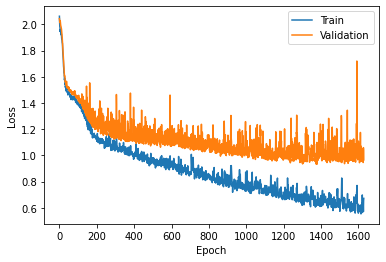

In [17]:
# summarize history for loss
plt.plot(history_1.history['loss'])#[5:])
plt.plot(history_1.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

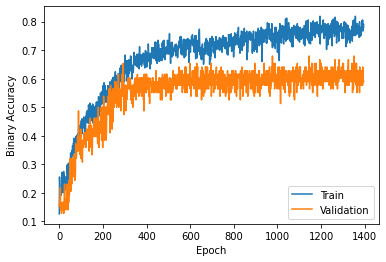

In [ ]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])#[5:])
plt.plot(history_1.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Model 2

### Declaration

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_2 = keras.Sequential([
    layers.Dense(512, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(256, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)

### Training

In [ ]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/2000
10/10 [==============================] - 1s 40ms/step - loss: 2.3370 - accuracy: 0.1197 - val_loss: 2.0476 - val_accuracy: 0.1923
Epoch 2/2000
10/10 [==============================] - 0s 11ms/step - loss: 2.1680 - accuracy: 0.1521 - val_loss: 2.0481 - val_accuracy: 0.2308
Epoch 3/2000
10/10 [==============================] - 0s 13ms/step - loss: 2.0783 - accuracy: 0.1748 - val_loss: 2.0494 - val_accuracy: 0.2179
Epoch 4/2000
10/10 [==============================] - 0s 11ms/step - loss: 2.0566 - accuracy: 0.1877 - val_loss: 2.0518 - val_accuracy: 0.2179
Epoch 5/2000
10/10 [==============================] - 0s 11ms/step - loss: 2.0354 - accuracy: 0.1974 - val_loss: 2.0357 - val_accuracy: 0.2179
Epoch 6/2000
10/10 [==============================] - 0s 12ms/step - loss: 2.0093 - accuracy: 0.2136 - val_loss: 2.0471 - val_accuracy: 0.2179
Epoch 7/2000
10/10 [==============================] - 0s 12ms/step - loss: 2.0490 - accuracy: 0.1942 - val_loss: 2.0366 - val_accuracy: 0.2051

### Evaluation and Graphs

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

3/3 [==============================] - 0s 5ms/step - loss: 0.7995 - accuracy: 0.6410
Model loss on the test set: 0.7994661927223206
Model accuracy on the test set: 64.10%


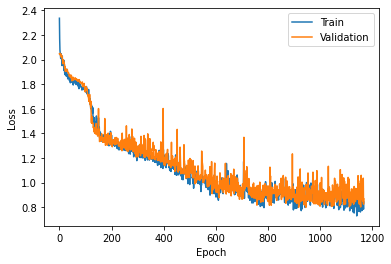

In [ ]:
# summarize history for loss
plt.plot(history_2.history['loss'])#[5:])
plt.plot(history_2.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

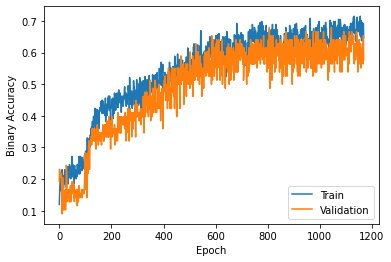

In [ ]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])#[5:])
plt.plot(history_2.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()